In [1]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt


In [2]:
exp = 'E1'
p = '/home/box/coding/M/analysis/'
E1_mouse_stats_df = pd.read_csv(f'{p}{exp}_mouse_stats.csv', index_col=0)
E1_inter_incr_df = pd.read_csv(f'{p}{exp}_inter_incr.csv', index_col=0)
E1_inter_df = pd.read_csv(f'{p}{exp}_inter.csv', index_col=0)
E1_nose_3D_df = pd.read_csv(f'{p}{exp}_nose_3D.csv', index_col=0)
E1_lever_rot_df = pd.read_csv(f'{p}{exp}_lever_rot.csv', index_col=0)
E1_stick_3D_df = pd.read_csv(f'{p}{exp}_stick_3D.csv', index_col=0)
E1_ball_3D_df = pd.read_csv(f'{p}{exp}_ball_3D.csv', index_col=0)
E1_door_3D_df = pd.read_csv(f'{p}{exp}_door_3D.csv', index_col=0)
E1_mouse_lks_df = pd.read_csv(f'{p}{exp}_mouse_lks.csv', index_col=0)

E1_lever_stats_df = pd.DataFrame()
E1_stick_stats_df = pd.DataFrame()
E1_ball_stats_df = pd.DataFrame()
E1_door_stats_df = pd.DataFrame()

E1_lever_stats_df['d_lever'] = (E1_lever_rot_df['dist'].apply(lambda x: 1 if x > 10 else 0)).astype(int)
E1_stick_stats_df['d_stick'] = (E1_stick_3D_df['dist'].apply(lambda x: 1 if x > 5 else 0)).astype(int)
E1_ball_stats_df['d_ball'] = (E1_ball_3D_df['dist'].apply(lambda x: 1 if x > 5 else 0)).astype(int)
E1_door_stats_df['d_door'] = (E1_door_3D_df['dist'].apply(lambda x: 1 if x > 5 else 0)).astype(int)

E1_lever_stats_df.loc[E1_lever_stats_df.index.isin(E1_mouse_lks_df[E1_mouse_lks_df < 0.2].index), 'd_lever'] = 0
E1_stick_stats_df.loc[E1_stick_stats_df.index.isin(E1_mouse_lks_df[E1_mouse_lks_df < 0.2].index), 'd_stick'] = 0
E1_ball_stats_df.loc[E1_ball_stats_df.index.isin(E1_mouse_lks_df[E1_mouse_lks_df < 0.2].index), 'd_ball'] = 0
E1_door_stats_df.loc[E1_door_stats_df.index.isin(E1_mouse_lks_df[E1_mouse_lks_df < 0.2].index), 'd_door'] = 0

exp = 'E2'
E2_mouse_stats_df = pd.read_csv(f'{p}{exp}_mouse_stats.csv', index_col=0)
E2_inter_incr_df = pd.read_csv(f'{p}{exp}_inter_incr.csv', index_col=0)
E2_inter_df = pd.read_csv(f'{p}{exp}_inter.csv', index_col=0)
E2_nose_3D_df = pd.read_csv(f'{p}{exp}_nose_3D.csv', index_col=0)
E2_lever_rot_df = pd.read_csv(f'{p}{exp}_lever_rot.csv', index_col=0)
E2_stick_3D_df = pd.read_csv(f'{p}{exp}_stick_3D.csv', index_col=0)
E2_ball_3D_df = pd.read_csv(f'{p}{exp}_ball_3D.csv', index_col=0)
E2_door_3D_df = pd.read_csv(f'{p}{exp}_door_3D.csv', index_col=0)
E2_mouse_lks_df = pd.read_csv(f'{p}{exp}_mouse_lks.csv', index_col=0)

E2_lever_stats_df = pd.DataFrame()
E2_stick_stats_df = pd.DataFrame()
E2_ball_stats_df = pd.DataFrame()
E2_door_stats_df = pd.DataFrame()

E2_lever_stats_df['d_lever'] = (E2_lever_rot_df['dist'].apply(lambda x: 1 if x > 10 else 0)).astype(int)
E2_stick_stats_df['d_stick'] = (E2_stick_3D_df['dist'].apply(lambda x: 1 if x > 5 else 0)).astype(int)
E2_ball_stats_df['d_ball'] = (E2_ball_3D_df['dist'].apply(lambda x: 1 if x > 5 else 0)).astype(int)
E2_door_stats_df['d_door'] = (E2_door_3D_df['dist'].apply(lambda x: 1 if x > 5 else 0)).astype(int)

E2_lever_stats_df.loc[E2_lever_stats_df.index.isin(E2_mouse_lks_df[E2_mouse_lks_df < 0.2].index), 'd_lever'] = 0
E2_stick_stats_df.loc[E2_stick_stats_df.index.isin(E2_mouse_lks_df[E2_mouse_lks_df < 0.2].index), 'd_stick'] = 0
E2_ball_stats_df.loc[E2_ball_stats_df.index.isin(E2_mouse_lks_df[E2_mouse_lks_df < 0.2].index), 'd_ball'] = 0
E2_door_stats_df.loc[E2_door_stats_df.index.isin(E2_mouse_lks_df[E2_mouse_lks_df < 0.2].index), 'd_door'] = 0

In [3]:
E1_lever_stats_df['rot'] = E1_lever_rot_df.w_avg

E1_door_3D_df['open'] = (E1_door_3D_df['y'] <= 57).astype(int)


k = []
for i in range(len(E1_lever_stats_df)):
    if E1_lever_stats_df.rot.iloc[i] < 10:
        l_open = 0
    else:
        l_open = 1
    k.append(l_open)
E1_lever_stats_df['open'] = k

lever_opened_frames = []
test = E1_lever_stats_df[E1_lever_stats_df.index.isin(E1_inter_df[E1_inter_df.lever == 1].index)]
last = 0
for i in test.index:
    if test.loc[i].open != last and test.loc[i].open == 0:
        lever_opened_frames.append(i)
    last = test.loc[i].open  

door_open_frames = []
test = E1_door_3D_df#[E1_door_3D_df.index.isin(E1_inter_df[E1_inter_df.door == 1].index)]
last = 0
for i in test.index:
    if test.loc[i].open != last:
        door_open_frames.append(i)
    last = test.loc[i].open
    
    
E1_stick_3D_df['open'] = (E1_stick_3D_df['x'] < -40).astype(int)
stick_open_frames = []
test = E1_stick_3D_df#[E1_stick_3D_df.index.isin(E1_inter_df[E1_inter_df.stick == 1].index)]
last = 0
for i in test.index:
    if test.loc[i].open != last:
        stick_open_frames.append(i)
    last = test.loc[i].open
    
E1_ball_3D_df['open'] = (((abs(E1_ball_3D_df['x']) > 86 + 26) | (abs(E1_ball_3D_df['x']) < 86 - 26)) & 
                   ((abs(E1_ball_3D_df['y']) > 34 + 15) | (abs(E1_ball_3D_df['y']) < 34 - 15))).astype(int)

ball_open_frames = []
test = E1_ball_3D_df[E1_ball_3D_df.index.isin(E1_inter_df[E1_inter_df.ball == 1].index)]
last = 0
for i in test.index:
    if test.loc[i].open != last:
        ball_open_frames.append(i)

cleaned_lever = [frame for frame in lever_opened_frames if frame < stick_open_frames[0]]
cleaned_stick = [frame for frame in stick_open_frames if frame > cleaned_lever[-1]]
cleaned_ball = [frame for frame in ball_open_frames if frame > cleaned_stick[-1]]
cleaned_door = [frame for frame in door_open_frames if frame > cleaned_ball[-1]]

E1_cleaned_lever = cleaned_lever
E1_cleaned_stick = cleaned_stick[0]
E1_cleaned_ball = cleaned_ball[0]
E1_cleaned_door = cleaned_door[0]

data = {
    'open_lever': [E1_cleaned_lever[0]],
    'open_stick': [E1_cleaned_stick],
    'open_ball': [E1_cleaned_ball],
    'open_door': [E1_cleaned_door],
    'interactions_lever': [E1_inter_incr_df.lever.iloc[-1]],
    'interactions_stick': [E1_inter_incr_df.stick.iloc[-1]],
    'interactions_ball': [E1_inter_incr_df.ball.iloc[-1]],
    'interactions_door': [E1_inter_incr_df.door.iloc[-1]],
    'on_task': [len(E1_inter_incr_df)]
}

mouse_1_stats = pd.DataFrame(data)

In [4]:
E2_lever_stats_df['rot'] = E2_lever_rot_df.w_avg

E2_door_3D_df['open'] = (E2_door_3D_df['y'] <= 57).astype(int)


k = []
for i in range(len(E2_lever_stats_df)):
    if E2_lever_stats_df.rot.iloc[i] < 10:
        l_open = 0
    else:
        l_open = 1
    k.append(l_open)
E2_lever_stats_df['open'] = k

lever_opened_frames = []
test = E2_lever_stats_df[E2_lever_stats_df.index.isin(E2_inter_df[E2_inter_df.lever == 1].index)]
last = 0
for i in test.index:
    if test.loc[i].open != last and test.loc[i].open == 0:
        lever_opened_frames.append(i)
    last = test.loc[i].open  

door_open_frames = []
test = E2_door_3D_df#[E2_door_3D_df.index.isin(E2_inter_df[E2_inter_df.door == 1].index)]
last = 0
for i in test.index:
    if test.loc[i].open != last:
        door_open_frames.append(i)
    last = test.loc[i].open
    
    
E2_stick_3D_df['open'] = (E2_stick_3D_df['x'] < -40).astype(int)
stick_open_frames = []
test = E2_stick_3D_df#[E2_stick_3D_df.index.isin(E2_inter_df[E2_inter_df.stick == 1].index)]
last = 0
for i in test.index:
    if test.loc[i].open != last:
        stick_open_frames.append(i)
    last = test.loc[i].open
    
E2_ball_3D_df['open'] = (((abs(E2_ball_3D_df['x']) > 86 + 26) | (abs(E2_ball_3D_df['x']) < 86 - 26)) & 
                   ((abs(E2_ball_3D_df['y']) > 34 + 15) | (abs(E2_ball_3D_df['y']) < 34 - 15))).astype(int)

ball_open_frames = []
test = E2_ball_3D_df[E2_ball_3D_df.index.isin(E2_inter_df[E2_inter_df.ball == 1].index)]
last = 0
for i in test.index:
    if test.loc[i].open != last:
        ball_open_frames.append(i)

cleaned_lever = [frame for frame in lever_opened_frames if frame < stick_open_frames[0]]
cleaned_stick = [frame for frame in stick_open_frames if frame > cleaned_lever[-1]]
cleaned_ball = [frame for frame in ball_open_frames if frame > cleaned_stick[-1]]
cleaned_door = [frame for frame in door_open_frames if frame > cleaned_ball[-1]]

E2_cleaned_lever = cleaned_lever
E2_cleaned_stick = cleaned_stick[0]
E2_cleaned_ball = cleaned_ball[0]
E2_cleaned_door = cleaned_door[0]

data = {
    'open_lever': [E2_cleaned_lever[0]],
    'open_stick': [E2_cleaned_stick],
    'open_ball': [E2_cleaned_ball],
    'open_door': [E2_cleaned_door],
    'interactions_lever': [E2_inter_incr_df.lever.iloc[-1]],
    'interactions_stick': [E2_inter_incr_df.stick.iloc[-1]],
    'interactions_ball': [E2_inter_incr_df.ball.iloc[-1]],
    'interactions_door': [E2_inter_incr_df.door.iloc[-1]],
    'on_task': [len(E2_inter_incr_df)]
}

mouse_2_stats = pd.DataFrame(data)

In [5]:

# Assuming E1_lever_stats_df is already defined and contains 'sum' and 'd' columns.
fig = plt.figure(figsize=(24, 6), dpi=1000)
ax = fig.add_subplot()

ax.plot(E1_inter_incr_df.lever, c='blue')
ax.plot(E1_inter_incr_df.stick, c='green')
ax.plot(E1_inter_incr_df.ball, c='magenta')
ax.plot(E1_inter_incr_df.door, c='red')

ax.vlines(E1_cleaned_lever[0], ymin=0, ymax = E1_inter_incr_df.door.max(), linestyles='dashed', label='lever', color='blue')
ax.vlines(E1_cleaned_stick, ymin=0, ymax = E1_inter_incr_df.door.max(), linestyles='dashed', label='stick', color='green')
ax.vlines(E1_cleaned_ball, ymin=0, ymax = E1_inter_incr_df.door.max(), linestyles='dashed', label='ball', color='magenta')
ax.vlines(E1_cleaned_door, ymin=0, ymax = E1_inter_incr_df.door.max(), linestyles='dashed', label='door', color='red')

plt.title('Mouse 1 lockbox interactions and open timestamps')
plt.legend()
plt.show()

In [6]:

# Assuming E2_lever_stats_df is already defined and contains 'sum' and 'd' columns.
fig = plt.figure(figsize=(24, 6), dpi=1000)
ax = fig.add_subplot()

ax.plot(E2_inter_incr_df.lever, c='blue')
ax.plot(E2_inter_incr_df.stick, c='green')
ax.plot(E2_inter_incr_df.ball, c='magenta')
ax.plot(E2_inter_incr_df.door, c='red')

ax.vlines(E2_cleaned_lever[0], ymin=0, ymax = E2_inter_incr_df.door.max(), linestyles='dashed', label='lever', color='blue')
ax.vlines(E2_cleaned_stick, ymin=0, ymax = E2_inter_incr_df.door.max(), linestyles='dashed', label='stick', color='green')
ax.vlines(E2_cleaned_ball, ymin=0, ymax = E2_inter_incr_df.door.max(), linestyles='dashed', label='ball', color='magenta')
ax.vlines(E2_cleaned_door, ymin=0, ymax = E2_inter_incr_df.door.max(), linestyles='dashed', label='door', color='red')

plt.title('Mouse 2 lockbox interactions and open timestamps')
plt.legend()
plt.show()

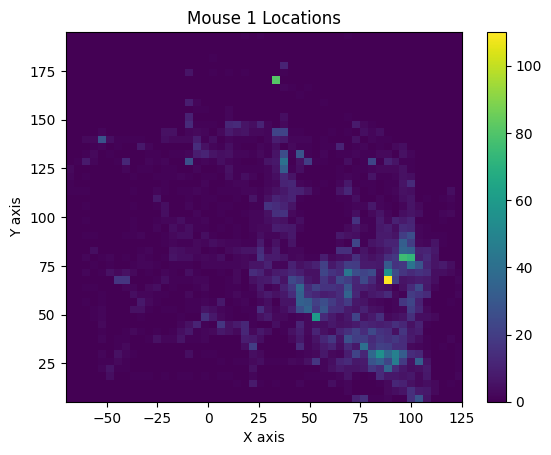

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# nose_filtered_3d_clean
mouse_to_track = E1_nose_3D_df[(E1_nose_3D_df['s_x'] < 200)&(E1_nose_3D_df['s_y'] < 200)][['s_x','s_y']]
# Select two axes for projection, e.g., x and y
x = mouse_to_track.s_x
y = mouse_to_track.s_y

# Create a 2D histogram (heatmap)
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)

# Plot the heatmap
plt.imshow(heatmap.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Mouse 1 Locations')
plt.show()


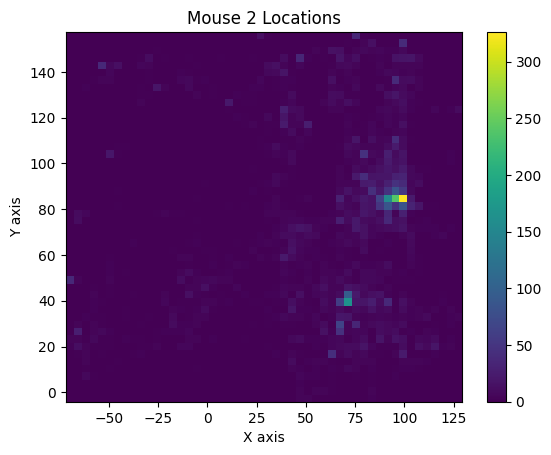

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# nose_filtered_3d_clean
mouse_to_track = E2_nose_3D_df[(E2_nose_3D_df['s_x'] < 200)&(E2_nose_3D_df['s_y'] < 200)][['s_x','s_y']]
# Select two axes for projection, e.g., x and y
x = mouse_to_track.s_x
y = mouse_to_track.s_y

# Create a 2D histogram (heatmap)
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)

# Plot the heatmap
plt.imshow(heatmap.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Mouse 2 Locations')
plt.show()


In [9]:
mouse_2_stats

,open_lever,open_stick,open_ball,open_door,interactions_lever,interactions_stick,interactions_ball,interactions_door,on_task
0,5245,17705,17869,18987,466,272,464,1835,2903


In [10]:
mouse_1_stats

,open_lever,open_stick,open_ball,open_door,interactions_lever,interactions_stick,interactions_ball,interactions_door,on_task
0,3856,13493,15538,16438,1043,236,888,1165,3139


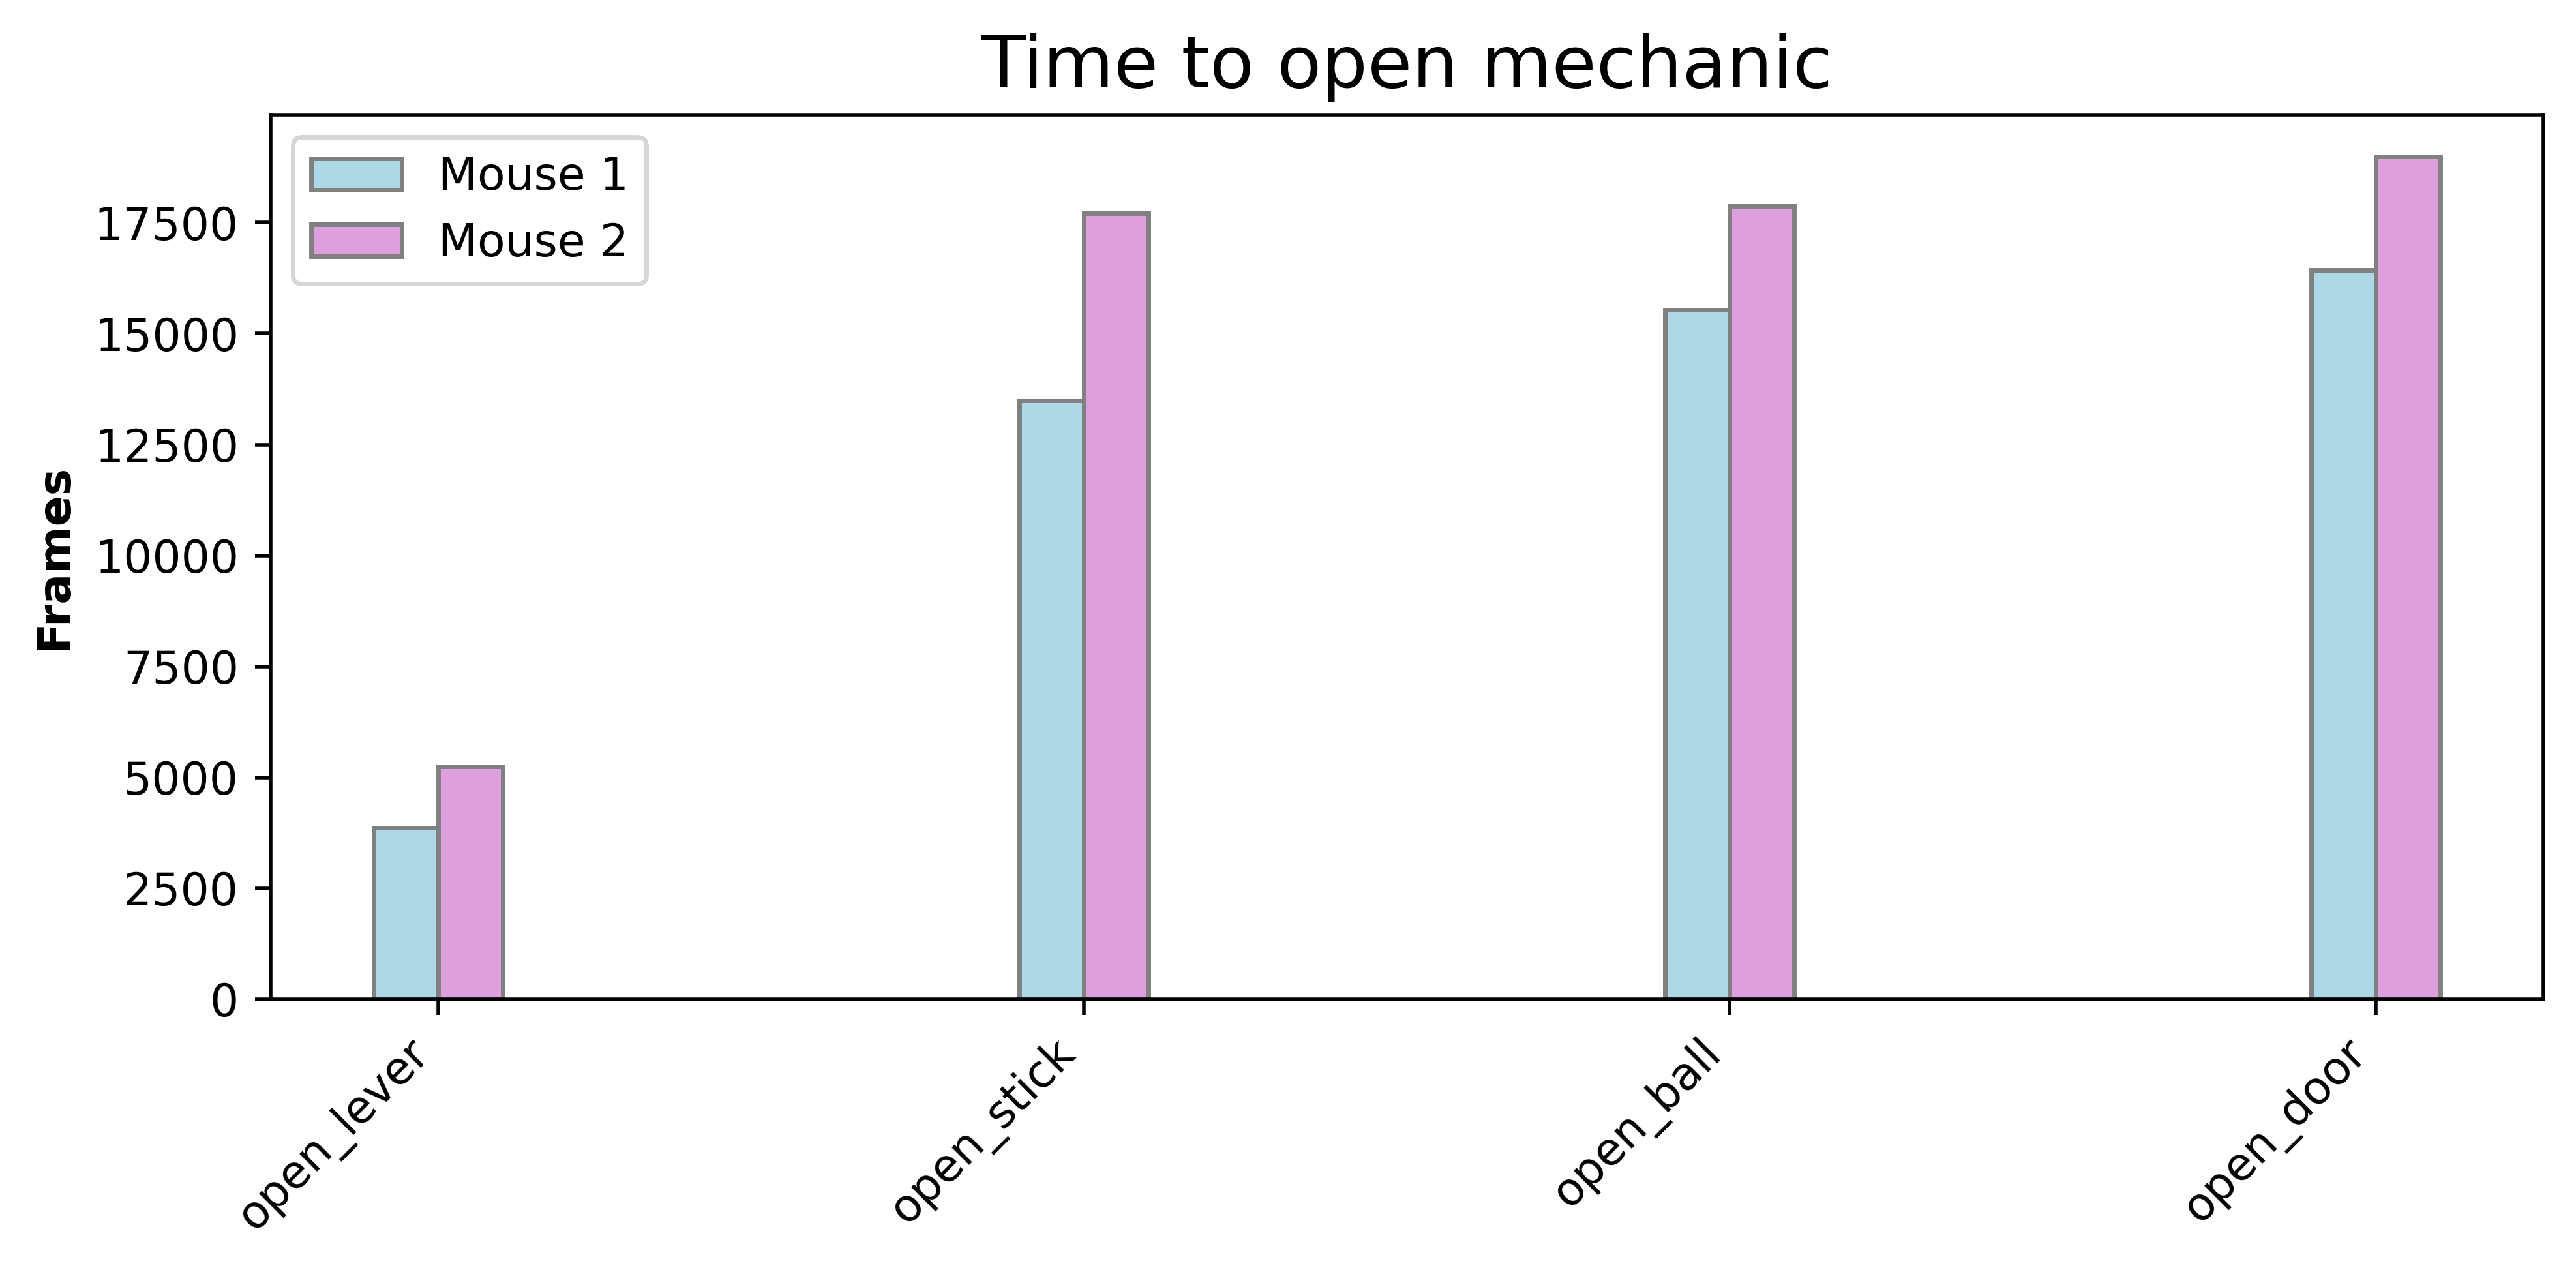

In [12]:
# Adjusting the bar chart with softer pastel colors and improving aesthetics
fig, ax = plt.subplots(figsize=(8, 4), dpi=500)

# Bar width
bar_width = 0.1

# Bar positions
r1 = range(len(mouse_1_stats.filter(like='open_').columns))
r2 = [x + bar_width for x in r1]

# First DataFrame bars with pastel colors
ax.bar(r1, mouse_1_stats.filter(like='open_').loc[0], color='lightblue', width=bar_width, edgecolor='grey', label='Mouse 1')

# Second DataFrame bars with pastel colors
ax.bar(r2, mouse_2_stats.filter(like='open_').loc[0], color='plum', width=bar_width, edgecolor='grey', label='Mouse 2')

# Labels and title
ax.set_ylabel('Frames', fontweight='bold')
ax.set_title('Time to open mechanic', fontsize=16)
ax.set_xticks([r + bar_width/2 for r in range(len(mouse_1_stats.filter(like='open_').columns))])
ax.set_xticklabels(mouse_1_stats.filter(like='open_').columns, rotation=45, ha='right')
ax.legend()

# Improve layout
plt.tight_layout()
plt.show()


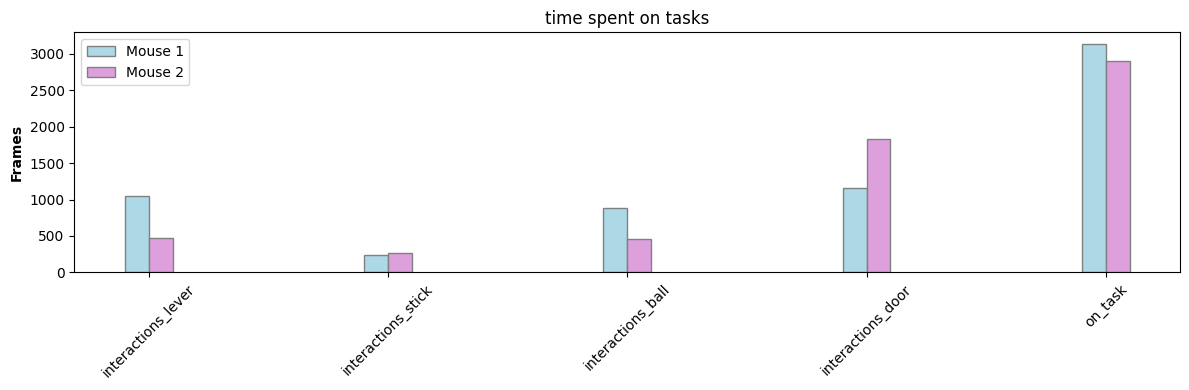

In [66]:
# Plotting side-by-side bar charts
fig, ax = plt.subplots(figsize=(12, 4))

# Bar width
bar_width = 0.1

plot_df1 = mouse_1_stats[['interactions_lever','interactions_stick','interactions_ball','interactions_door','on_task']]
plot_df2 = mouse_2_stats[['interactions_lever','interactions_stick','interactions_ball','interactions_door','on_task']]

# Bar positions
r1 = range(len(plot_df1.columns))
r2 = [x + bar_width for x in r1]

# First DataFrame bars
ax.bar(r1, plot_df1.loc[0], color='lightblue', width=bar_width, edgecolor='grey', label='Mouse 1')

# Second DataFrame bars
ax.bar(r2, plot_df2.loc[0], color='plum', width=bar_width, edgecolor='grey', label='Mouse 2')

# Labels and title
ax.set_ylabel('Frames', fontweight='bold')
ax.set_title('time spent on tasks')
ax.set_xticks([r + bar_width/2 for r in range(len(plot_df2.columns))])
ax.set_xticklabels(plot_df2.columns, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

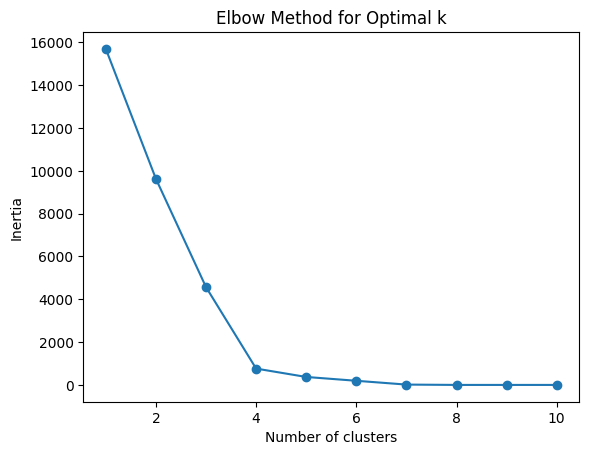

/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         lever      ball      door     stick
Cluster                                     
0          0.0  1.000000  0.052133  0.000000
1          0.0  0.035144  0.814696  0.188498
2          1.0  0.000000  0.096836  0.000000
         lever      ball      door  stick
Cluster                                  
0          0.0  1.000000  0.052133    0.0
1          1.0  0.000000  0.096836    0.0
2          0.0  0.000000  1.000000    0.0
3          0.0  0.186441  0.016949    1.0


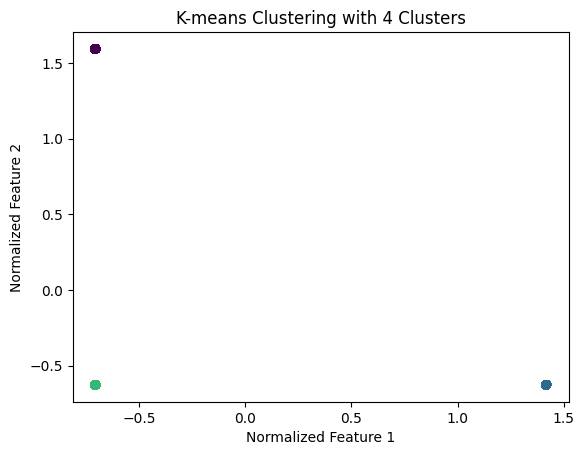

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalize data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(E1_inter_df)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply k-means with optimal number of clusters (choose k based on Elbow plot)
optimal_k = 3  # Example, set based on Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
E1_inter_df['Cluster'] = kmeans.fit_predict(normalized_data)

# Analyze the segments
print(E1_inter_df.groupby('Cluster').mean())

# Normalize data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(E1_inter_df)

# Apply k-means with optimal number of clusters (4 in this case)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
E1_inter_df['Cluster'] = kmeans.fit_predict(normalized_data)

# Analyze the segments
cluster_means = E1_inter_df.groupby('Cluster').mean()
print(cluster_means)

# Optionally visualize the clusters
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=E1_inter_df['Cluster'], cmap='viridis')
plt.xlabel('Normalized Feature 1')
plt.ylabel('Normalized Feature 2')
plt.title('K-means Clustering with 4 Clusters')
plt.show()


/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

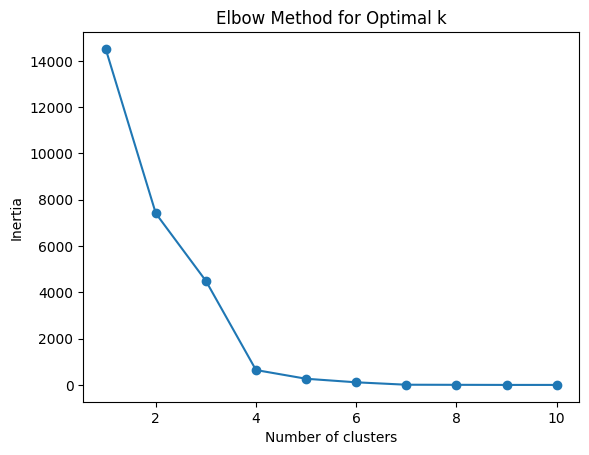

/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         lever  ball      door     stick
Cluster                                 
0          0.0   0.0  0.896604  0.103903
1          1.0   0.0  0.083691  0.000000
2          0.0   1.0  0.058190  0.144397
         lever  ball      door     stick
Cluster                                 
0          0.0   0.0  1.000000  0.000000
1          0.0   1.0  0.058190  0.144397
2          1.0   0.0  0.083691  0.000000
3          0.0   0.0  0.004878  1.000000


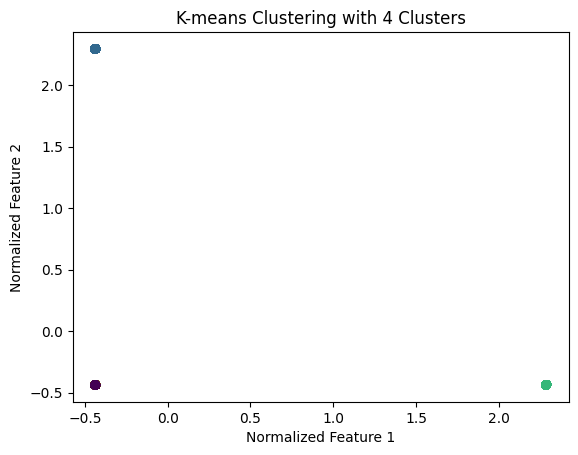

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalize data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(E2_inter_df)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply k-means with optimal number of clusters (choose k based on Elbow plot)
optimal_k = 3  # Example, set based on Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
E2_inter_df['Cluster'] = kmeans.fit_predict(normalized_data)

# Analyze the segments
print(E2_inter_df.groupby('Cluster').mean())

# Normalize data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(E2_inter_df)

# Apply k-means with optimal number of clusters (4 in this case)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
E2_inter_df['Cluster'] = kmeans.fit_predict(normalized_data)

# Analyze the segments
cluster_means = E2_inter_df.groupby('Cluster').mean()
print(cluster_means)

# Optionally visualize the clusters
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=E2_inter_df['Cluster'], cmap='viridis')
plt.xlabel('Normalized Feature 1')
plt.ylabel('Normalized Feature 2')
plt.title('K-means Clustering with 4 Clusters')
plt.show()


In [14]:
cluster_means = E1_inter_df.groupby('Cluster').mean()
pd.DataFrame(cluster_means)

,lever,ball,door,stick
Cluster,,,,
0,0.0,1.000000,0.052133,0.0
1,1.0,0.000000,0.096836,0.0
2,0.0,0.000000,1.000000,0.0
3,0.0,0.186441,0.016949,1.0


In [15]:
cluster_means = E2_inter_df.groupby('Cluster').mean()
pd.DataFrame(cluster_means)

,lever,ball,door,stick
Cluster,,,,
0,0.0,0.0,1.000000,0.000000
1,0.0,1.0,0.058190,0.144397
2,1.0,0.0,0.083691,0.000000
3,0.0,0.0,0.004878,1.000000
